# Procesamiento de datos
Fecha: 4 Diciembre 2024

## Indice
1. **Comentario sobre append de listas** <br>
2. **Introducción a la estadística** <br>
2.1 **Medidas de tendencia central** <br>
2.2 **Cuartiles y percentiles** <br>
2.3 **Medidas de dispersión** <br>
2.4 **Correlación** <br>

3. Groupby <br>
4. Limpieza del set de datos <br>
4.1 Valores faltantes <br>
4.2 Registros duplicados <br>
4.3 Columnas correlacionadas <br>


Antes de empezar, importamos los paquetes que vamos a utilizar:

In [ ]:
import pandas as pd
import numpy as np

## 2. Introducción a la estadística

### 2.1 Medidas de tendencia central: Media y mediana

La **media**, promedio o media aritmética es una medida de centralización de un conjunto de puntos. Para un conjunto de valores, la media se define como: <br>

<h1><center> $\hat x = \frac{1}{N} \Sigma_{i=1}^{N} x_i$ </center></h1>

La **mediana** es otra medida de centralización. Se calcula de forma que en el conjunto de puntos, ordenado de menor a mayor, el 50% de los puntos tienen valores inferiores al de la mediana y el 50% de los puntos tiene valores  superiores.

- Si el conjunto tiene un número impar de elementos: Se toma el valor del elemento central.
- Si el conjunto tiene un número par de elementos: Se toma la media de los dos elementos centrales.

Estas medidas se pueden calcular o podemos hacer uso de numpy. Veamos un ejemplo:

In [ ]:
conjunto_de_valores = [3,5,4,1,4,1,1]

Calculamos la media:

In [ ]:
np.mean(conjunto_de_valores)

Calculamos la mediana:

In [ ]:
np.median(conjunto_de_valores)

Como comentábamos, si el conjunto tiene un número impar de elementos, tomamos el elemento central como mediana

In [ ]:
print('Número de elementos: ' + str(len(conjunto_de_valores)))

#Ordenamos los elementos
conjunto_de_valores.sort()
print('Elementos ordenados: ' + str(conjunto_de_valores))

Pero si nuestro conjunto de valores es par, tomamos la media de los dos centrales:

In [ ]:
conjunto_de_valores = [3,5,4,1,4,1,1,6]

conjunto_de_valores.sort()
print('Elementos ordenados: ' + str(conjunto_de_valores))

In [ ]:
np.median(conjunto_de_valores)

La media y la mediana tienen propiedades diferentes. Una de las más significativas es que la media es sensible a valores extremos, mientras que **la mediana es mas robusta** frente a valores extremos.
Podemos ver esta diferencia si por ejemplo analizamos los salarios de una población. ¿Tiene sentido hablar de media de salarios cuando algunas personas pueden representar valores extremos?

In [ ]:
# Creamos un conjutos de valores
conjunto_de_valores_a = [3,5,4,1,4,1,1,6]

print('Conjunto de valores : ' + str(conjunto_de_valores_a) )
print('media: ' + str(np.mean(conjunto_de_valores_a)))
print('mediana: ' + str(np.median(conjunto_de_valores_a)))

In [ ]:
# Creamos un conjutos de valores con un valor extremo:
conjunto_de_valores_b = [3,5,4,1,4,1,1,60000]

print('Conjunto de valores : ' + str(conjunto_de_valores_b))
print('media: ' + str(np.mean(conjunto_de_valores_b)))
print('mediana: ' + str(np.median(conjunto_de_valores_b)))

## 2.2 Cuartiles y percentiles

La mediana dividía el conjunto de datos en dos. Los cuartiles dividen el conjunto de datos en cuatro,
de forma que, en un conjunto de valores ordenados de menor a mayor:
- El primer cuartil se interpreta como la mediana de la primera mitad de los valores
- El segundo cuartil es la propia mediana del conjunto de valores
- El tercer cuartil se interpreta como la mediana de la segunda mitad de valores


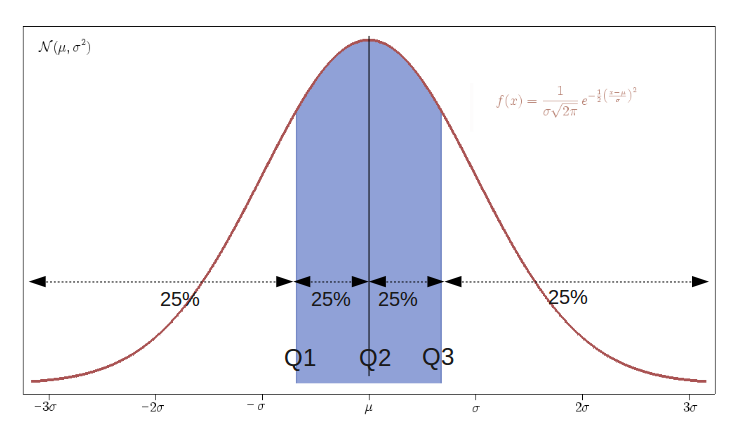


Los percentiles dividen el conjunto de datos, ordenados de menor a mayor, de forma que en cada uno de ellos haya un 1% de los datos totales. Tendremos las equivalencias:

- El percentil 25 es el primer cuartil.
- El percentil 50 es el segundo cuartil que, a su vez, es la mediana.
- El percentil 75 es el tercer cuartil.

Numpy también tiene una función para calcular los percentiles:

In [ ]:
# Creamos un conjutos de valores
conjunto_de_valores = [3,5,4,1,4,1,1,6,7, 6, 3]
conjunto_de_valores.sort()

print('Conjunto de valores ordenados: ' + str(conjunto_de_valores) )
print('Percentil 25 o Cuantil 1: ' + str(np.quantile(conjunto_de_valores, .25)))
print('Percentil 50 o Cuantil 2 o mediana: ' + str(np.quantile(conjunto_de_valores, .50)))
print('Percentil 75 o Cuantil 3: ' + str(np.quantile(conjunto_de_valores, .75)))

## 2.3 Medidas de dispersión

De la misma forma que necesitamos medidas de centralización, definimos medidas de dispersión que nos den una idea de cuán separados están los datos en nuestra distribución.
Tres medidas fundamentales son la varianza, la desviación típica y el rango intercuartílico:
- La varianza se define como el promedio del cuadrado de la separación de cada punto de la distribución respecto a la media:

<h1><center>  $\sigma ^2 = \frac{1}{N} \Sigma_{i=1}^{N}(x_i - \hat x)^2 $ </center></h1>

- La desviación típica se define como la raíz cuadrada de la varianza:

<h1><center>  $\sigma = \sqrt {\frac{1}{N} \Sigma_{i=1}^{N}(x_i - \hat x)^2} $ </center></h1>

- El rango intercuartílico se define como el valor del tercer cuartil menos el valor del primer cuartil:

<h1><center> $IQR = Q3 - Q1$ </center></h1>

Veamos como se calcula con numpy en el siguiente ejemplo:

In [ ]:
# Creamos un conjutos de valores
conjunto_de_valores_a = [3,5,4,1,4,1,1,6]

print('Conjunto de valores : ' + str(conjunto_de_valores_a) )
print('Media: ' + str(np.mean(conjunto_de_valores_a)))
print('Desviación estandar: ' + str(np.std(conjunto_de_valores_a)))
print('Varianza: ' + str(np.var(conjunto_de_valores_a)))


Combiene aquí comentar que mientras que el rango intercuartílico es robusto frente a outliers, la varianza y la desviación típica no lo son. Existe también la llamada **desviación absoluta respecto a la mediana** (en inglés median absolute deviation, MAD) que se usa en estadística robusta y se calcula como:

<h1><center>  $MAD = median(abs(x_i - median(x_i))) $ </center></h1>


## 2.4 Correlación

La correlación entre dos variables es una medida que **nos indica cómo se comporta una variable respecto al comportamiento de otra**. La correlación entre la variable A y la variable B es un número entre -1 y +1 y, de manera intuitiva, nos dice cómo de probable es que el valor de la variable A aumente si consideramos que el valor de la variable B ha aumentado.

- Si la correlación es cero, nos dice que el valor de la variable A no está influido por la variable B, es decir, que si la variable B aumenta, la variable A puede hacer cualquier cosa.

- Si la correlación es un número positivo, indica que es algo probable que el valor de la variable A aumente al aumentar el valor de la variable B. Si es un número cercano a +1 nos indica que es muy probable.

- Si la correlación es un número negativo, indica que es algo probable que el valor de la variable A disminuya al aumentar el valor de la variable B. Si es un número cercano a 1 nos indica que es muy probable.


Los dos tipos mas comunes de correlacion que encontraremos son el de Pearson y el de Spearman:

- La de Pearson es la más utilizada, y nos indica si la relación entre las variables es una relación lineal. La correlación de Pearson se calcula como:

<h1><center>  $\rho_{x,y} = \frac{\sigma_{x,y}}{\sigma_x\sigma_y}$</center></h1>,

donde $\sigma_{x,y} =   \Sigma_{i=1}^{N}(x_i - \hat x)(y_i - \hat y) $ es la covarianza de x e y.

- La de Spearman nos indica si la relación entre las variables es una relación monótona.


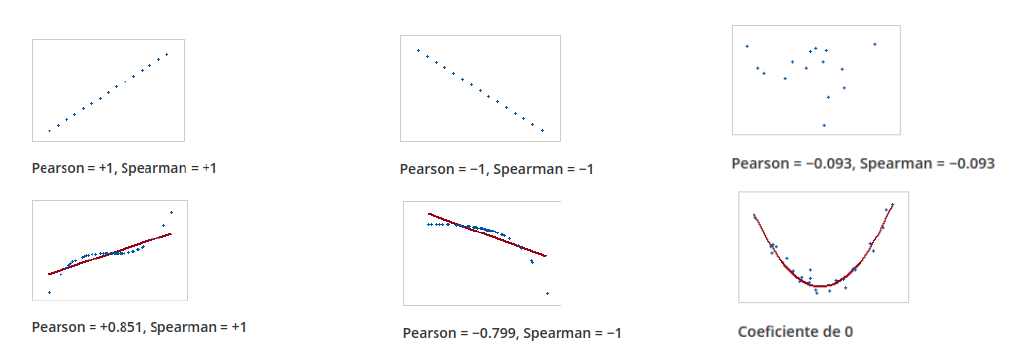

En numpy, el coeficiente de pearson se puede escribir como numpy.corrcoef(tu_array). En pandas, se puede escribir como tu_df.corr() sin especificar o como tu_df.corr(method='pearson'). Los coeficientes de correlación de Spearman se pueden escribir como tu_df.corr(method='spearman').
